In [ ]:
#code adapted from https://www.tensorflow.org/tutorials/images/transfer_learning
#as well as some code adapted from Dr Nina Dethlefs, university of hull

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import metrics
import pathlib
#importing required modules

In [2]:
test_dir = './test'
train_dir = './train'
val_dir = './valid'
#setting directories in this folder
print(test_dir)
print(train_dir)
print(val_dir)
#printing directories to be sure 
IMG_SIZE = (224, 224)
#setting resultion for later

./test
./train


In [3]:
batch_size = 150
#setting bach size
img_height = 224
img_width = 224
#setting height and width seperatly
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
seed=123,
#splitting training ds and testing ds with the same seed to it can be replicated
image_size=(img_height, img_width),
#setting image size
batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
val_dir,
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
#checking class names and number of files 
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
#repeating for test ds (needed later)

Found 13572 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'p

In [4]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
#shuffling the data within the traning and validation sets
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#normalising the training dataset
image_batch, labels_batch = next(iter(normalized_ds))
#joining images with thier lables
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))
#checking for normalisation of the RGB values in the image
num_classes = 100
#setting number of classes to be predicted

0.0 1.0


In [5]:
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,
img_width, 3)),
#initialise model
layers.Conv2D(100,(3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(140, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(180, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(220, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(260, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(300, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
#adding layersin sequence, drop out probablility 0.4, kernel size 3x3, max pooling only pooling 
layers.Conv2D(340, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
#flatten layer takes multidimentional data and makes it 1d
layers.Dense(380, activation='relu'),
layers.Dense(num_classes)
#classifier
])
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.summary()
#compile model and print summary 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 100)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 100)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 140)     126140    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 140)      0         
 2D)                                                    

In [6]:
epochs=20
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
#train over 20 epochs and save to history variable

Epoch 1/20
91/91 [==============================] - 26s 249ms/step - loss: 4.5512 - accuracy: 0.0183 - val_loss: 4.4832 - val_accuracy: 0.0280
Epoch 2/20
91/91 [==============================] - 20s 225ms/step - loss: 4.2361 - accuracy: 0.0362 - val_loss: 4.1942 - val_accuracy: 0.0420
Epoch 3/20
91/91 [==============================] - 20s 222ms/step - loss: 4.0640 - accuracy: 0.0562 - val_loss: 4.0764 - val_accuracy: 0.0580
Epoch 4/20
91/91 [==============================] - 21s 227ms/step - loss: 3.8168 - accuracy: 0.0888 - val_loss: 3.9107 - val_accuracy: 0.0760
Epoch 5/20
91/91 [==============================] - 21s 232ms/step - loss: 3.5051 - accuracy: 0.1444 - val_loss: 3.5625 - val_accuracy: 0.1740
Epoch 6/20
91/91 [==============================] - 21s 231ms/step - loss: 3.2214 - accuracy: 0.1934 - val_loss: 3.2348 - val_accuracy: 0.2160
Epoch 7/20
91/91 [==============================] - 21s 233ms/step - loss: 2.9726 - accuracy: 0.2449 - val_loss: 2.9628 - val_accuracy: 0.2700

In [7]:
model.evaluate(test_dataset)
#evaluate on test dataset

4/4 [==============================] - 1s 75ms/step - loss: 1.5943 - accuracy: 0.5600


[1.5942763090133667, 0.5600000023841858]

In [8]:
model.evaluate(test_dataset)
predictions = model.predict(test_dataset)
pred_classes = np.argmax(predictions, axis=1)
#predict classes

4/4 [==============================] - 0s 83ms/step


In [9]:
model.save('.adam_model')
#save adam model

INFO:tensorflow:Assets written to: .adam_model\assets


INFO:tensorflow:Assets written to: .adam_model\assets


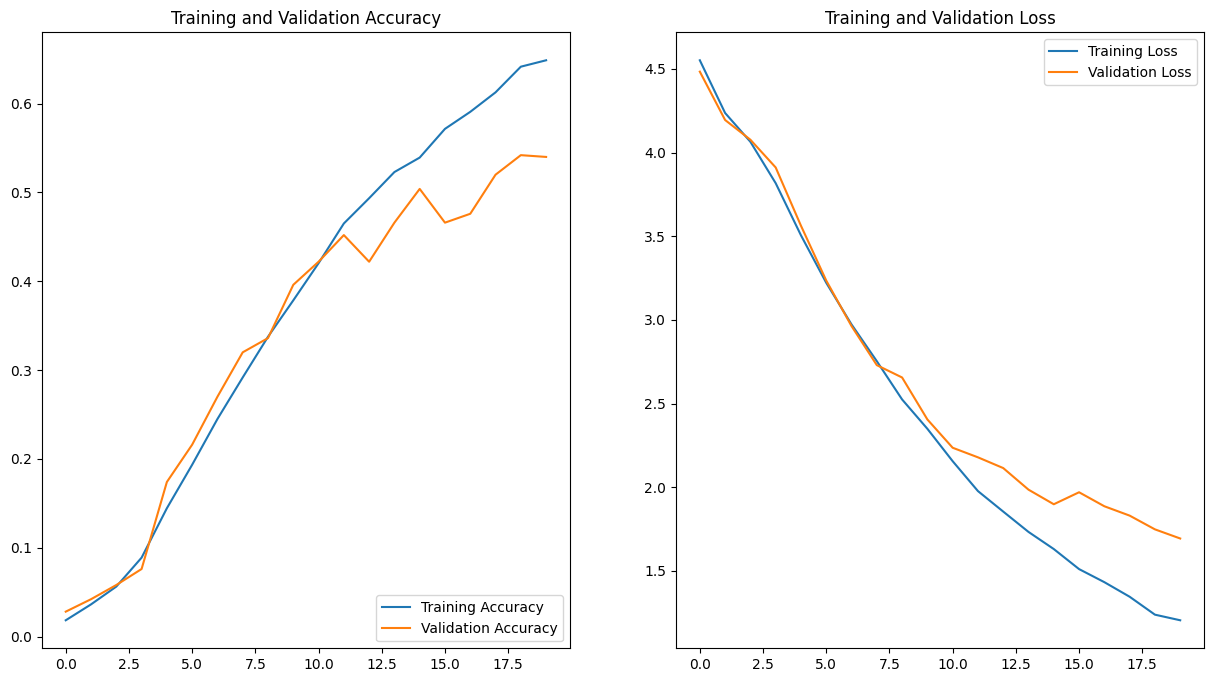

In [10]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('.loss and accuracy adam')
plt.show()
#print and save figures 

In [11]:
#remaining code is the same as above with the only change being the optimizer and the number of epochs
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,
img_width, 3)),
layers.Conv2D(100,(3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(140, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(180, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(220, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(260, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),
layers.Conv2D(300, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.4),

layers.Conv2D(340, (3,3), padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(380, activation='relu'),
layers.Dense(num_classes)
])
model.compile(optimizer='RMSprop',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 100)     2800      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 100)    0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 112, 112, 100)     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 140)     126140    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 140)      0         
 2D)                                                  

In [12]:
epochs=18
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/18
91/91 [==============================] - 23s 240ms/step - loss: 4.6575 - accuracy: 0.0128 - val_loss: 4.6050 - val_accuracy: 0.0100
Epoch 2/18
91/91 [==============================] - 22s 239ms/step - loss: 4.5112 - accuracy: 0.0230 - val_loss: 4.3887 - val_accuracy: 0.0320
Epoch 3/18
91/91 [==============================] - 21s 236ms/step - loss: 4.2653 - accuracy: 0.0407 - val_loss: 4.2005 - val_accuracy: 0.0700
Epoch 4/18
91/91 [==============================] - 22s 238ms/step - loss: 4.0407 - accuracy: 0.0723 - val_loss: 3.9126 - val_accuracy: 0.0840
Epoch 5/18
91/91 [==============================] - 22s 239ms/step - loss: 3.7495 - accuracy: 0.1158 - val_loss: 3.6401 - val_accuracy: 0.1400
Epoch 6/18
91/91 [==============================] - 21s 235ms/step - loss: 3.5141 - accuracy: 0.1597 - val_loss: 3.3385 - val_accuracy: 0.1980
Epoch 7/18
91/91 [==============================] - 22s 236ms/step - loss: 3.2452 - accuracy: 0.2078 - val_loss: 3.0357 - val_accuracy: 0.2820

In [13]:
model.evaluate(test_dataset)
predictions = model.predict(test_dataset)
pred_classes = np.argmax(predictions, axis=1)

4/4 [==============================] - 0s 85ms/step


In [14]:
model.save('.RMSprop_model')

INFO:tensorflow:Assets written to: .RMSprop_model\assets


INFO:tensorflow:Assets written to: .RMSprop_model\assets


In [15]:
pred_classes



array([39, 36, 55, 43,  3, 97, 46, 51, 94, 47, 47, 18,  3, 25, 45, 78,  0,
       49, 86, 82,  9, 29,  7, 17, 67, 23, 20, 68,  1,  3, 81, 87, 51, 78,
       86, 74, 47, 22,  1, 16, 72, 27, 74, 71, 78,  6, 89, 78, 37,  9, 74,
        1, 80, 20, 66, 58, 96, 47, 85, 55, 46, 49,  2, 36, 97, 93, 49, 95,
       69, 81, 50, 94, 75, 82, 95, 34, 65, 36, 58, 89, 91, 12, 67, 35, 26,
       40, 29, 62, 15, 30, 89, 72, 66, 49, 10, 67, 40, 57, 67, 44, 38,  9,
        1,  1, 76, 97, 45, 67, 23,  7, 46, 61, 61,  7, 68, 93, 27, 44, 57,
       37, 55, 55, 58, 67,  2, 39, 21, 10, 15, 92, 67, 75, 25, 74,  0, 29,
       29, 31, 42, 75, 60, 74, 82, 49, 32, 14, 20, 78, 28, 81, 25, 64, 60,
       22, 36, 74, 52, 99, 41,  9, 46, 29, 22, 45, 21,  7, 51, 74, 60, 40,
        6, 43, 30, 90, 80,  6, 28, 39, 82, 82, 13, 41, 96, 34, 78, 33, 47,
        2, 71, 78, 41, 15, 27, 37, 35, 74, 30, 46, 87, 22, 96, 89, 64, 60,
       89, 22, 65, 13, 16, 60, 82, 28, 88,  1, 49, 74,  9, 77, 47, 44, 43,
       88, 14, 48, 47, 49

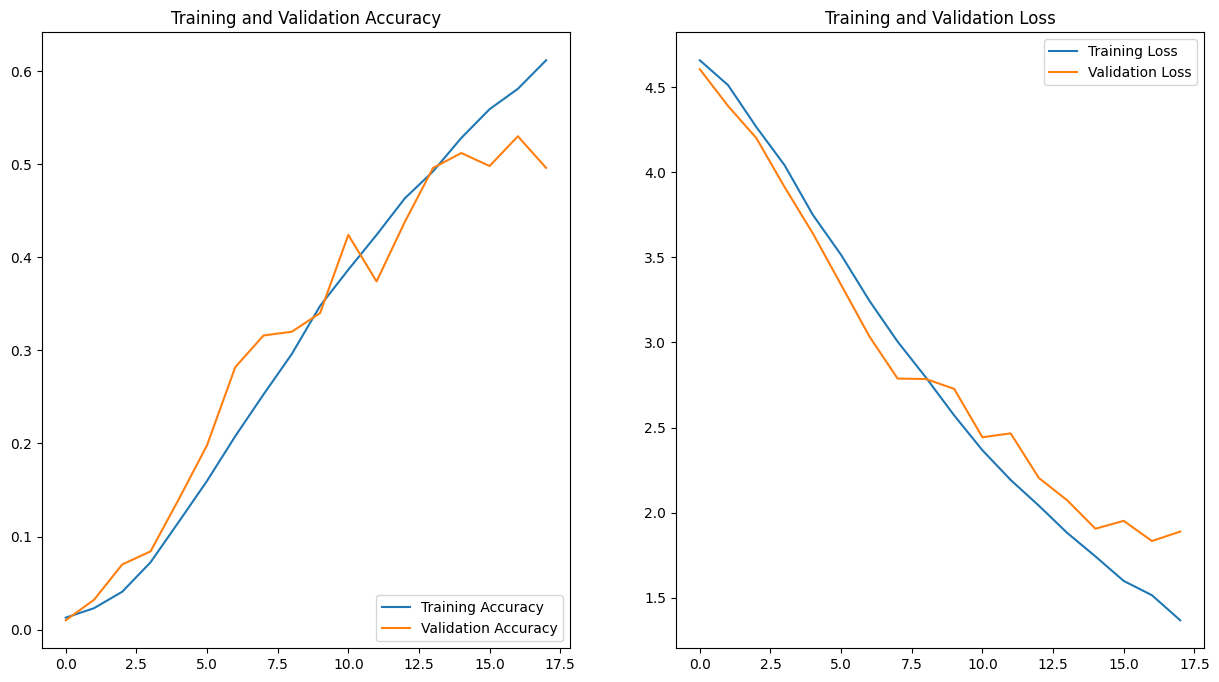

In [16]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('.loss and accuracy RMSporp')
plt.show()